Task 03

Problem Statment - Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import export_text
from sklearn.tree import plot_tree

In [13]:
df=pd.read_csv("C:\\Users\\SHONIMA SHAJI\\OneDrive\\Desktop\\Shonima IIsem\\Prodigy\\bankdata.csv")

In [14]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [15]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [16]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [18]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [19]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [20]:
#Seperating categorical columns from numerical columns
categorical_data=df.select_dtypes(include='object').columns
numerical_cols=df.select_dtypes(exclude='object').columns


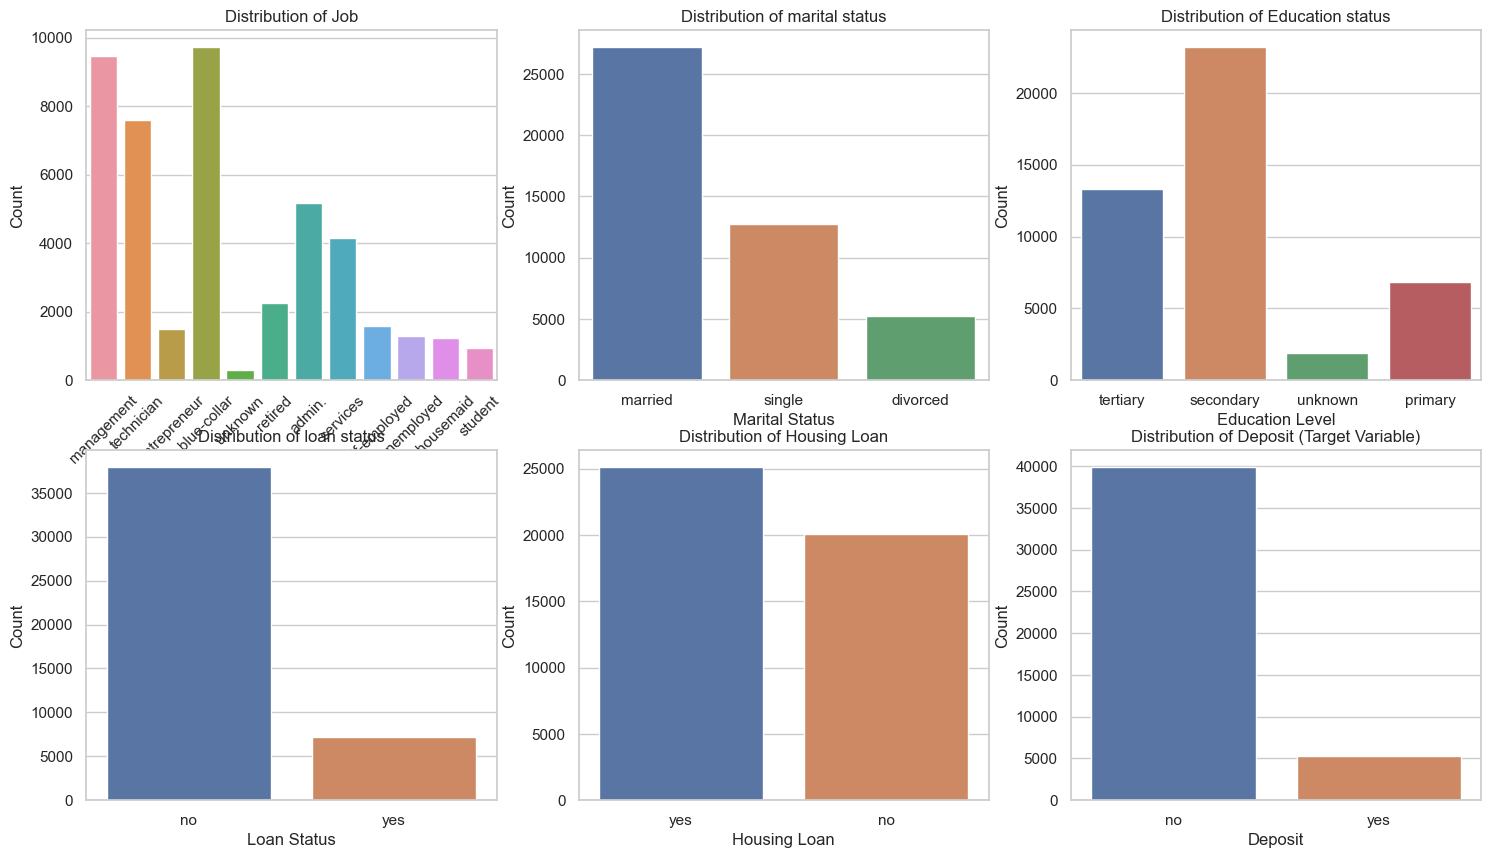

In [23]:
sns.set(style="whitegrid")
fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(18,10))
#barplot for 'Job'
sns.countplot(x='job',data=df,ax=axes[0,0])
axes[0,0].set_title('Distribution of Job')
axes[0,0].set_xlabel('Job')
axes[0,0].set_ylabel('Count')
axes[0,0].tick_params(axis='x',rotation=45)

#barplot for 'marital
sns.countplot(x='marital',data=df,ax=axes[0,1])
axes[0,1].set_title('Distribution of marital status')
axes[0,1].set_xlabel('Marital Status')
axes[0,1].set_ylabel('Count')

#barplot for 'education'
sns.countplot(x='education',data=df,ax=axes[0,2])
axes[0,2].set_title('Distribution of Education status')
axes[0,2].set_xlabel('Education Level')
axes[0,2].set_ylabel('Count')

#barplot for 'loan'
sns.countplot(x='loan',data=df,ax=axes[1,0])
axes[1,0].set_title('Distribution of loan status')
axes[1,0].set_xlabel('Loan Status')
axes[1,0].set_ylabel('Count')

#barplot for 'housing'
sns.countplot(x='housing',data=df,ax=axes[1,1])
axes[1,1].set_title('Distribution of Housing Loan')
axes[1,1].set_xlabel('Housing Loan')
axes[1,1].set_ylabel('Count')

#barplot for 'deposit' (target variable)
sns.countplot(x='y',data=df,ax=axes[1,2])
axes[1,2].set_title('Distribution of Deposit (Target Variable)')
axes[1,2].set_xlabel('Deposit')
axes[1,2].set_ylabel('Count')

plt.tight_layout
plt.show()

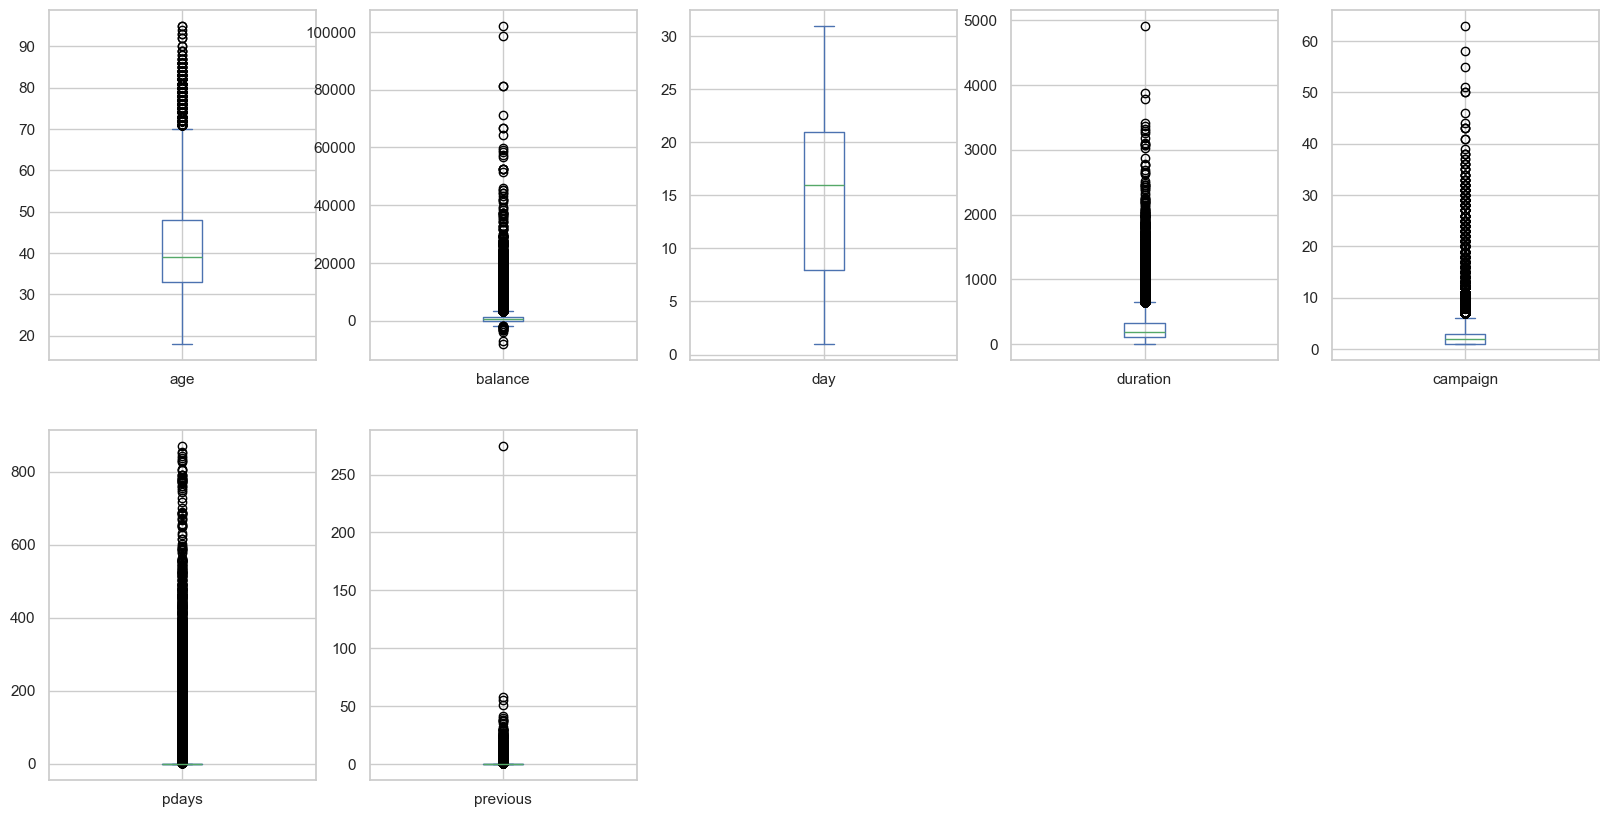

In [26]:
df.plot(kind= 'box' ,subplots=True,layout=(2,5),figsize=(20,10))
plt.show()

nan nan nan


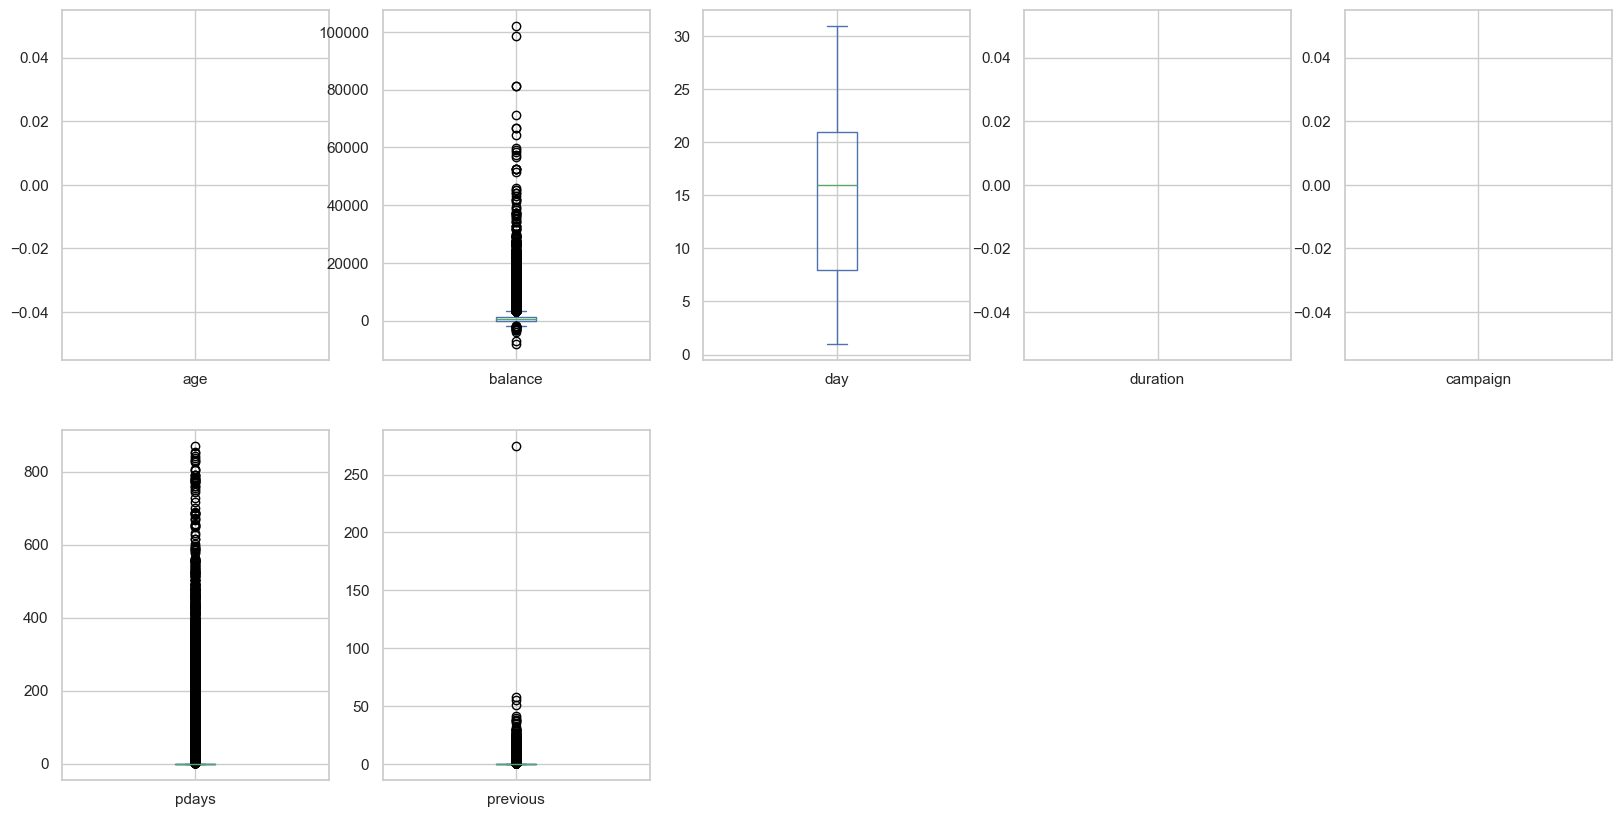

In [29]:
#removing the outliers
column=df[['age','duration','campaign']]
q1=np.quantile(column,0.25)
q3=np.quantile(column,0.75)
iqr=q3-q1
lower_bound=q1 - (1.5*iqr)
upper_bound=q3 + (1.5*iqr)
print(iqr,upper_bound,lower_bound)
df[['age','duration','campaign']]=column[(column > lower_bound)& (column < upper_bound)]
df.plot(kind = 'box',subplots= True,layout = (2,5),figsize = (20,10))
plt.show()

In [31]:
#converting categorical variables to numerical labels
df_encoded= df.apply(LabelEncoder().fit_transform)
df_encoded

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,4,1,2,0,3036,1,0,2,4,8,0,0,0,0,3,0
1,0,9,2,1,0,945,1,0,2,4,8,0,0,0,0,3,0
2,0,2,1,1,0,918,1,1,2,4,8,0,0,0,0,3,0
3,0,1,1,3,0,2420,1,0,2,4,8,0,0,0,0,3,0
4,0,11,2,3,0,917,0,0,2,4,8,0,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,9,1,2,0,1741,0,0,0,16,9,0,0,0,0,3,1
45207,0,5,0,0,0,2639,0,0,0,16,9,0,0,0,0,3,1
45208,0,5,1,1,0,5455,0,0,0,16,9,0,0,181,3,2,1
45209,0,1,1,1,0,1584,0,0,1,16,9,0,0,0,0,3,0


In [34]:
df_encoded['y'].value_counts()
#split data into features and target variables
x = df_encoded.drop('y',axis=1)
y = df_encoded['y']
print(x.shape)
print(y.shape)

#split data into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(45211, 16)
(45211,)
(36168, 16)
(9043, 16)
(36168,)
(9043,)


In [35]:
# Initializing the decision tree classifier
clf=DecisionTreeClassifier(random_state=42)
# Training the classifier on the training data
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [36]:
# Predicting the target variable on the test set
y_pred=clf.predict(x_test)

In [37]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)
print("classification Report:")
print(classification_report(y_test,y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.8269379630653544
classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      7952
           1       0.29      0.30      0.29      1091

    accuracy                           0.83      9043
   macro avg       0.60      0.60      0.60      9043
weighted avg       0.83      0.83      0.83      9043

Confusion Matrix:
[[7151  801]
 [ 764  327]]


|--- month <= 9.50
|   |--- pdays <= 8.50
|   |   |--- contact <= 1.50
|   |   |   |--- month <= 0.50
|   |   |   |   |--- housing <= 0.50
|   |   |   |   |   |--- contact <= 0.50
|   |   |   |   |   |   |--- balance <= 922.00
|   |   |   |   |   |   |   |--- job <= 1.50
|   |   |   |   |   |   |   |   |--- day <= 15.00
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- day >  15.00
|   |   |   |   |   |   |   |   |   |--- balance <= 880.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- balance >  880.00
|   |   |   |   |   |   |   |   |   |   |--- day <= 25.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- day >  25.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |--- job >  1.50
|   |   |   |   |   |   |   |   |--- day <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |  

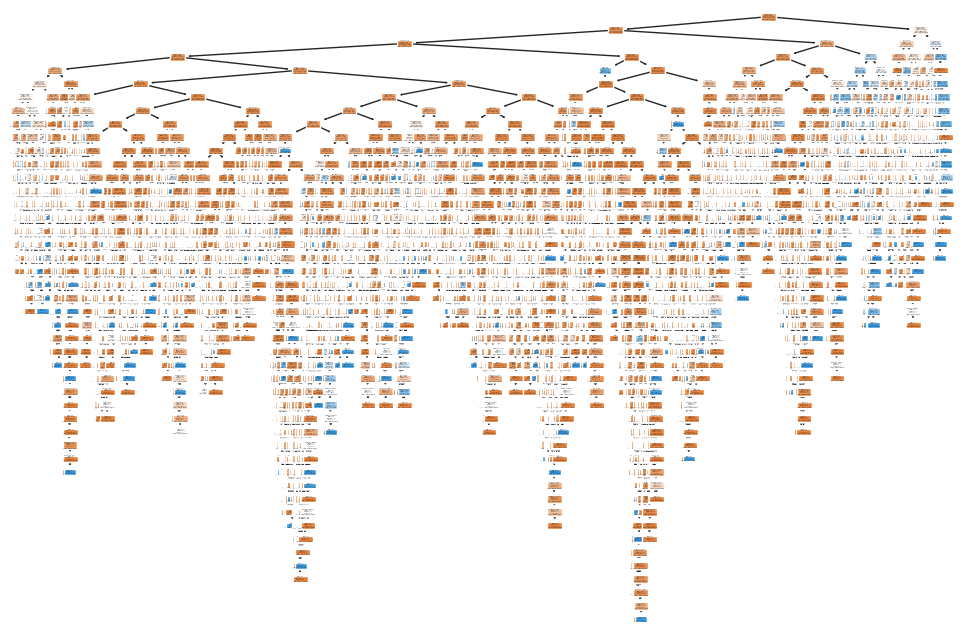

In [38]:
# Plotting the decision tree
tree_text = export_text(clf ,  feature_names=list(x.columns))
print(tree_text)
plt.figure(figsize=(12,8))
plot_tree(clf,feature_names=list(x.columns),class_names=['Not Purchased','Purchased'],filled=True)
plt.show()